In [ ]:
# ========================================================
# PCB DEFECT DETECTION: RESPONSE-BASED KNOWLEDGE DISTILLATION
# Student Model: YOLOv8n | Teacher: YOLOv8l (Trained)
# ========================================================

# 0. INSTALL & SETUP
# =========================================================
!pip install ultralytics --quiet

import os
import torch
from ultralytics import YOLO
from pathlib import Path
from google.colab import drive
import shutil
from datetime import datetime

# Mount Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Device
device = 0 if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Mounting Google Drive...
Mounted at /content/drive
Using device: 0


In [ ]:
# ============================================================
# EXTRACT ZIP FILE IN GOOGLE COLAB
# ============================================================

import zipfile
import os
from pathlib import Path
# ============================================================
# METHOD 3: Extract with Progress Bar (Advanced)
# ============================================================
print("\n\n" + "="*60)
print("METHOD 3: Extract with Progress Bar (Advanced)")
print("="*60)
print("\n# Uncomment the code below for detailed extraction progress:\n")


# Uncomment for extraction with progress bar:

from tqdm import tqdm
import zipfile

# Path to zip (update this)
ZIP_PATH = "/content/drive/MyDrive/PCB_Dataset/yolo_dataset_1024.zip"

if os.path.exists(ZIP_PATH):
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        members = zip_ref.namelist()

        print(f"📦 Extracting {len(members)} files...")
        for member in tqdm(members, desc="Extracting"):
            zip_ref.extract(member, '/content/')

    print("✅ Done!")
else:
    print(f"❌ Zip not found: {ZIP_PATH}")



# ============================================================
# HELPER: List Drive Contents
# ============================================================
print("\n\n" + "="*60)
print("HELPER: Show Google Drive Contents")
print("="*60)

def show_drive_contents(path="/content/drive/MyDrive"):
    """Show all folders and files in Google Drive"""
    print(f"\n📂 Contents of: {path}")
    try:
        p = Path(path)
        if p.exists():
            items = sorted(p.iterdir())
            for item in items[:20]:  # Show first 20 items
                if item.is_dir():
                    print(f"   📁 {item.name}/")
                else:
                    size = item.stat().st_size / (1024*1024)  # MB
                    print(f"   📄 {item.name} ({size:.2f} MB)")

            if len(items) > 20:
                print(f"   ... and {len(items) - 20} more items")
        else:
            print(f"   ❌ Path doesn't exist")
    except Exception as e:
        print(f"   ❌ Error: {e}")

# Show MyDrive root
show_drive_contents("/content/drive/MyDrive")

# Show PCB_Dataset folder (if it exists)
show_drive_contents("/content/drive/MyDrive/PCB_Dataset")


# ============================================================
# FINAL CHECK
# ============================================================
print("\n\n" + "="*60)
print("FINAL CHECK")
print("="*60)

dataset_path = Path('/content/yolo_dataset')
if dataset_path.exists():
    print("✅ Dataset is ready at: /content/yolo_dataset")

    # Count files
    total_images = 0
    total_labels = 0

    for split in ['train', 'val', 'test']:
        img_path = dataset_path / split / 'images'
        lbl_path = dataset_path / split / 'labels'

        if img_path.exists():
            imgs = len(list(img_path.glob('*.jpg'))) + len(list(img_path.glob('*.png')))
            total_images += imgs

        if lbl_path.exists():
            lbls = len(list(lbl_path.glob('*.txt')))
            total_labels += lbls

    print(f"   📊 Total: {total_images} images, {total_labels} labels")
    print("\n🎉 Ready to proceed with training!")

else:
    print("❌ Dataset not extracted yet")
    print("\n💡 Next steps:")
    print("   1. Make sure yolo_dataset.zip is in Google Drive")
    print("   2. Update ZIP_PATH in METHOD 1 above")
    print("   3. Run this cell again")
    print("   OR")
    print("   4. Use METHOD 2 (direct upload)")



METHOD 3: Extract with Progress Bar (Advanced)

# Uncomment the code below for detailed extraction progress:

📦 Extracting 16633 files...


Extracting: 100%|██████████| 16633/16633 [01:00<00:00, 273.26it/s]

✅ Done!


HELPER: Show Google Drive Contents

📂 Contents of: /content/drive/MyDrive
   📄 10.Approximate-Methods-3.pdf (0.98 MB)
   📄 3_Filltering_DrKhan_copy.pdf (13.62 MB)
   📄 4.Dynamic-Programming_copy.pdf (0.45 MB)
   📄 6_Lecture_MotionAnlysis_copy.pdf (5.52 MB)
   📄 7_DrKhan_SIFT_HOG_LBP.pdf (6.12 MB)
   📄 8.Approximate-Methods-1.pdf (0.82 MB)
   📄 9 (1).Approximate-Methods-2.pdf (1.26 MB)
   📄 9.Approximate-Methods-2.pdf (1.26 MB)
   📄 ASSIGNMENT 02 (SE-037).pdf (0.29 MB)
   📄 AVG csot.png (0.02 MB)
   📄 AVG.png (0.02 MB)
   📄 Assign_3_Image Matching from Handcrafted to Deep Features.pdf (6.88 MB)
   📄 Assignment #1(WE).docx (0.16 MB)
   📄 Assignment #1(WE).gdoc (0.00 MB)
   📄 Assignment #2(SE-037).pdf (7.66 MB)
   📄 CAO Assignment #1 (1).docx (0.05 MB)
   ❌ Error: [Errno 2] No such file or directory: '/content/drive/MyDrive/CAO Assignment #1 (1).gdoc'

📂 Contents of: /content/drive/MyDrive/PCB_Dataset
   📄 yolo_dataset.zip (5263.90 MB)
   📄 yolo_dataset_1024.zip (2168.60 MB)


F

In [ ]:
# ============================================================
# 3. Create data.yaml file
# ============================================================
print("\n" + "="*60)
print("📄 CREATING data.yaml")
print("="*60)

YAML_FILE_PATH = '/content/data.yaml'

# Define the YAML content with correct structure and absolute paths
data_yaml_content = """
names:
- missing_hole
- mouse_bite
- open_circuit
- short
- spur
- spurious_copper
nc: 6
scale:
- 1.0
- 1.0
- 1.0
- 1.0
- 2.0
- 1.0
train: /content//train/images
val: /content//val/images
test: /content/test/images
"""

# Write the content to the file
if Path('/content/').exists():
    with open(YAML_FILE_PATH, 'w') as f:
        f.write(data_yaml_content)

    print(f"✅ data.yaml created at: {YAML_FILE_PATH}")
    print("\nContents:")
    print("------------------------------------------------------------")
    print(data_yaml_content.strip())
    print("--------------------------------------")
else:
    print(f"❌ Cannot create data.yaml. Base dataset folder '/content/yolo_dataset' not found.")
    print("💡 Did the zip file extract successfully?")




📄 CREATING data.yaml
✅ data.yaml created at: /content/data.yaml

Contents:
------------------------------------------------------------
names:
- missing_hole
- mouse_bite
- open_circuit
- short
- spur
- spurious_copper
nc: 6
scale:
- 1.0
- 1.0
- 1.0
- 1.0
- 2.0
- 1.0
train: /content//train/images
val: /content//val/images
test: /content/test/images
--------------------------------------


In [ ]:

# ========================================================
# 1. PATHS (UPDATE ONLY THESE)
# ========================================================
TEACHER_WEIGHTS = "/content/drive/MyDrive/Teacher_PCB/yolov8l_pcb_teacher_v8_compatible/weights/best.pt"
DATA_YAML = "/content/data.yaml"
PROJECT_DIR = "/content/drive/MyDrive/Teacher_PCB"
STUDENT_RUN_NAME = "yolov8n_pcb_student_responseKD"

# Verify paths
assert os.path.exists(TEACHER_WEIGHTS), f"Teacher weights not found: {TEACHER_WEIGHTS}"
assert os.path.exists(DATA_YAML), f"data.yaml not found: {DATA_YAML}"



In [ ]:
# ========================================================
# 2. LOAD TEACHER (FROZEN)
# ========================================================
print("\nLoading Teacher Model (YOLOv8l)...")
teacher = YOLO(TEACHER_WEIGHTS)
teacher.model.eval()
for p in teacher.model.parameters():
    p.requires_grad = False
print("Teacher loaded and frozen.")

# ========================================================
# 3. CUSTOM RESPONSE KD TRAINER
# ========================================================
from ultralytics.engine.trainer import BaseTrainer
from ultralytics.models.yolo.detect import DetectionTrainer
import torch.nn.functional as F

class ResponseKDTrainer(DetectionTrainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher = teacher.model  # Frozen teacher
        self.temperature = 4.0
        self.alpha = 0.7
        print(f"Response KD Trainer initialized: T={self.temperature}, α={self.alpha}")

    def get_model(self, cfg=None, weights=None, verbose=True):
        # Load student model
        model = super().get_model(cfg, weights, verbose)
        return model

    def loss(self, x, *args, **kwargs):
        # Get student prediction and original task loss
        student_pred = self.model(x)
        task_loss, task_loss_items = super().loss(student_pred, *args, **kwargs)

        # Get teacher prediction (no grad)
        with torch.no_grad():
            teacher_pred = self.teacher(x)

        # Response KD: Distill logits (classification head)
        # Extract class logits from predictions (assuming YOLO format: [pred, proto] or similar)
        # For simplicity, use the classification component of the output
        student_logits = student_pred[0][..., 4:]  # Shape: [bs, anchors, classes] - adjust if needed
        teacher_logits = teacher_pred[0][..., 4:]

        # Soft targets
        soft_teacher = F.log_softmax(teacher_logits / self.temperature, dim=-1)
        soft_student = F.softmax(student_logits / self.temperature, dim=-1)

        # KL divergence (response loss)
        kd_loss = F.kl_div(soft_student, soft_teacher, reduction='batchmean') * (self.temperature ** 2)

        # Combined loss
        total_loss = task_loss + self.alpha * kd_loss
        loss_items = torch.cat((task_loss_items, torch.tensor([kd_loss.item()], device=task_loss_items.device)))
        return total_loss, loss_items

    def setup_model(self):
        super().setup_model()
        # Ensure student is on device
        self.model.to(self.device)

# ========================================================
# 4. TRAIN STUDENT WITH CUSTOM KD TRAINER
# ========================================================
print("\nStarting Response-Based KD Training (YOLOv8n)...")

student = YOLO("yolov8n.pt")  # Small & fast student

# Override trainer class for KD
student.trainer = ResponseKDTrainer

results = student.train(
    data=DATA_YAML,
    epochs=50,  # Reduced for testing; increase to 60 for full
    imgsz=512,
    batch=64,                    # Larger batch OK for small model
    device=device,
    project=PROJECT_DIR,
    name=STUDENT_RUN_NAME,
    exist_ok=True,
    patience=20,
    optimizer="AdamW",
    lr0=0.002,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    cache="ram",
    amp=True,
    plots=True,
    save_period=10,

    # === AUGMENTATIONS (Same as Teacher) ===
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    degrees=10.0, translate=0.1, scale=0.5, shear=2.0,
    fliplr=0.5, mosaic=1.0, mixup=0.15, copy_paste=0.1,
)

print("RESPONSE-BASED KD TRAINING COMPLETED!")


Loading Teacher Model (YOLOv8l)...
Teacher loaded and frozen.

Starting Response-Based KD Training (YOLOv8n)...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_pcb_student_responseKD, nbs=64

In [ ]:
from ultralytics import YOLO

# Load your best model
model = YOLO("/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD/weights/best.pt")

# Evaluate on training set
metrics_train = model.val(
    data="/content/data.yaml",   # ← put the correct path to your data.yaml here
    split="train",
    batch=16,
    imgsz=640,
    device=0,
    project="/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD",
    name="eval_on_train_set",
    exist_ok=True,
    verbose=True
)

# CORRECT WAY TO PRINT IN 2025 (Ultralytics ≥8.1.x)
print("=== TRAINING SET METRICS (Overall) ===")
print(f"Box Precision (P)   : {metrics_train.box.p.mean():.4f}")
print(f"Box Recall    (R)   : {metrics_train.box.r.mean():.4f}")
print(f"Box mAP@0.5         : {metrics_train.box.map50:.4f}")
print(f"Box mAP@0.5:0.95    : {metrics_train.box.map:.4f}")

print("\nPer-class mAP@0.5:0.95 on Train:")
for cls_name, ap in zip(metrics_train.names.values(), metrics_train.box.maps):
    print(f"  {cls_name:20} → {ap:.4f}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1811.8±1656.0 MB/s, size: 393.6 KB)
val: Scanning /content/train/labels... 6361 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6361/6361 1.2Kit/s 5.3s
val: New cache created: /content/train/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 398/398 4.3it/s 1:32
                   all       6361      27126      0.973      0.932      0.967      0.641
          missing_hole       1055       4560      0.984      0.988      0.993      0.719
            mouse_bite       1056       4523      0.959      0.913      0.951      0.618
          open_circuit       1064       4436      0.979      0.918      0.965      0.599
                 short       1065       4508      0.988      0.952      0.981      0.686
     

In [ ]:
# ========================================================
# 4. LOAD BEST STUDENT & EVALUATE
# ========================================================
best_student_path = f"{PROJECT_DIR}/{STUDENT_RUN_NAME}/weights/best.pt"
student = YOLO(best_student_path)

print("\nEvaluating on VALIDATION SET...")
val_metrics = student.val(data=DATA_YAML, split='val', plots=True, save_json=True)

print("\nEvaluating on TEST SET...")
test_metrics = student.val(data=DATA_YAML, split='test', plots=True, save_json=True)

# ========================================================
# 5. PRINT CLASS-WISE RESULTS (BEAUTIFUL FORMAT)
# ========================================================
def print_metrics(metrics, title):
    print(f"\n{title}")
    print("=" * 90)
    print(f"{'Class':<18} {'P':>8} {'R':>8} {'mAP50':>8} {'mAP50-95':>10}")
    print("-" * 90)
    for i, name in metrics.names.items():
        print(f"{name:<18} {metrics.box.p[i]:8.4f} {metrics.box.r[i]:8.4f} {metrics.box.ap50[i]:8.4f} {metrics.box.ap[i]:10.4f}")
    print("-" * 90)
    print(f"{'OVERALL':<18} {metrics.box.mp:8.4f} {metrics.box.mr:8.4f} {metrics.box.map50:8.4f} {metrics.box.map:10.4f}")
    print(f"mAP50-95: {metrics.box.map:.4f} | mAP50: {metrics.box.map50:.4f} | Precision: {metrics.box.mp:.4f} | Recall: {metrics.box.mr:.4f}")

print_metrics(val_metrics, "VALIDATION SET - RESPONSE KD STUDENT")
print_metrics(test_metrics, "TEST SET - RESPONSE KD STUDENT")




Evaluating on VALIDATION SET...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2474.1±824.5 MB/s, size: 369.3 KB)
val: Scanning /content/val/labels... 1123 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1123/1123 2.0Kit/s 0.6s
val: New cache created: /content/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 71/71 4.5it/s 15.8s
                   all       1123       4752      0.969      0.922      0.956      0.605
          missing_hole        187        810      0.989      0.992      0.993      0.711
            mouse_bite        186        787       0.95      0.878      0.912      0.552
          open_circuit        188        763      0.957      0.883      0.949       0.55
                 short        188        797      0.981      0.954 

In [ ]:
# ========================================================
# 6. SAVE FINAL RESULTS
# ========================================================
final_folder = f"/content/drive/MyDrive/PCB_ResponseKD_Final_{datetime.now().strftime('%Y%m%d_%H%M')}"
os.makedirs(final_folder, exist_ok=True)
shutil.copytree(f"{PROJECT_DIR}/{STUDENT_RUN_NAME}", final_folder, dirs_exist_ok=True)

print(f"\nALL RESULTS, WEIGHTS, PLOTS SAVED TO:\n{final_folder}")



ALL RESULTS, WEIGHTS, PLOTS SAVED TO:
/content/drive/MyDrive/PCB_ResponseKD_Final_20251127_0705


In [ ]:
from ultralytics import YOLO
import os

# Path to your student run (the one missing results.png)
run_path = "/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD"

# Load the best weights (just to get the model architecture)
model = YOLO(os.path.join(run_path, "weights/best.pt"))

# This single line will:
# 1. Read your existing results.csv (all 50 epochs)
# 2. Generate the exact same results.png as your teacher
# 3. Save it directly into your student folder
model.val(
    data="/content/data.yaml",           # your data.yaml
    imgsz=512,
    batch=16,
    device=0,
    project="/content/drive/MyDrive/Teacher_PCB",
    name="yolov8n_pcb_student_responseKD",   # ← same folder name = overwrites/adds files
    exist_ok=True,
    plots=True,          # ← this forces results.png + all other plots
    save=False,          # we don't need new validation results
    conf=0.001,
    half=True
)

print("DONE! Check your folder now — results.png is there exactly like your teacher's!")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3977.8±1039.3 MB/s, size: 255.8 KB)
val: Scanning /content/val/labels.cache... 1123 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1123/1123 2.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 71/71 4.9it/s 14.6s
                   all       1123       4752      0.969      0.923      0.957      0.604
          missing_hole        187        810      0.989      0.992      0.993      0.709
            mouse_bite        186        787       0.95      0.878      0.914      0.548
          open_circuit        188        763       0.96      0.886      0.952      0.549
                 short        188        797      0.981      0.954      0.981      0.661
                  spur        186        788      0.96

In [ ]:
# Run this single line in a new cell
!python -c "from ultralytics.utils.plotting import plot_results; plot_results('/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD/results.csv', show=False)"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/utils/__init__.py", line 372, in wrapper
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
TypeError: plot_results() got an unexpected keyword argument 'show'


Columns found: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


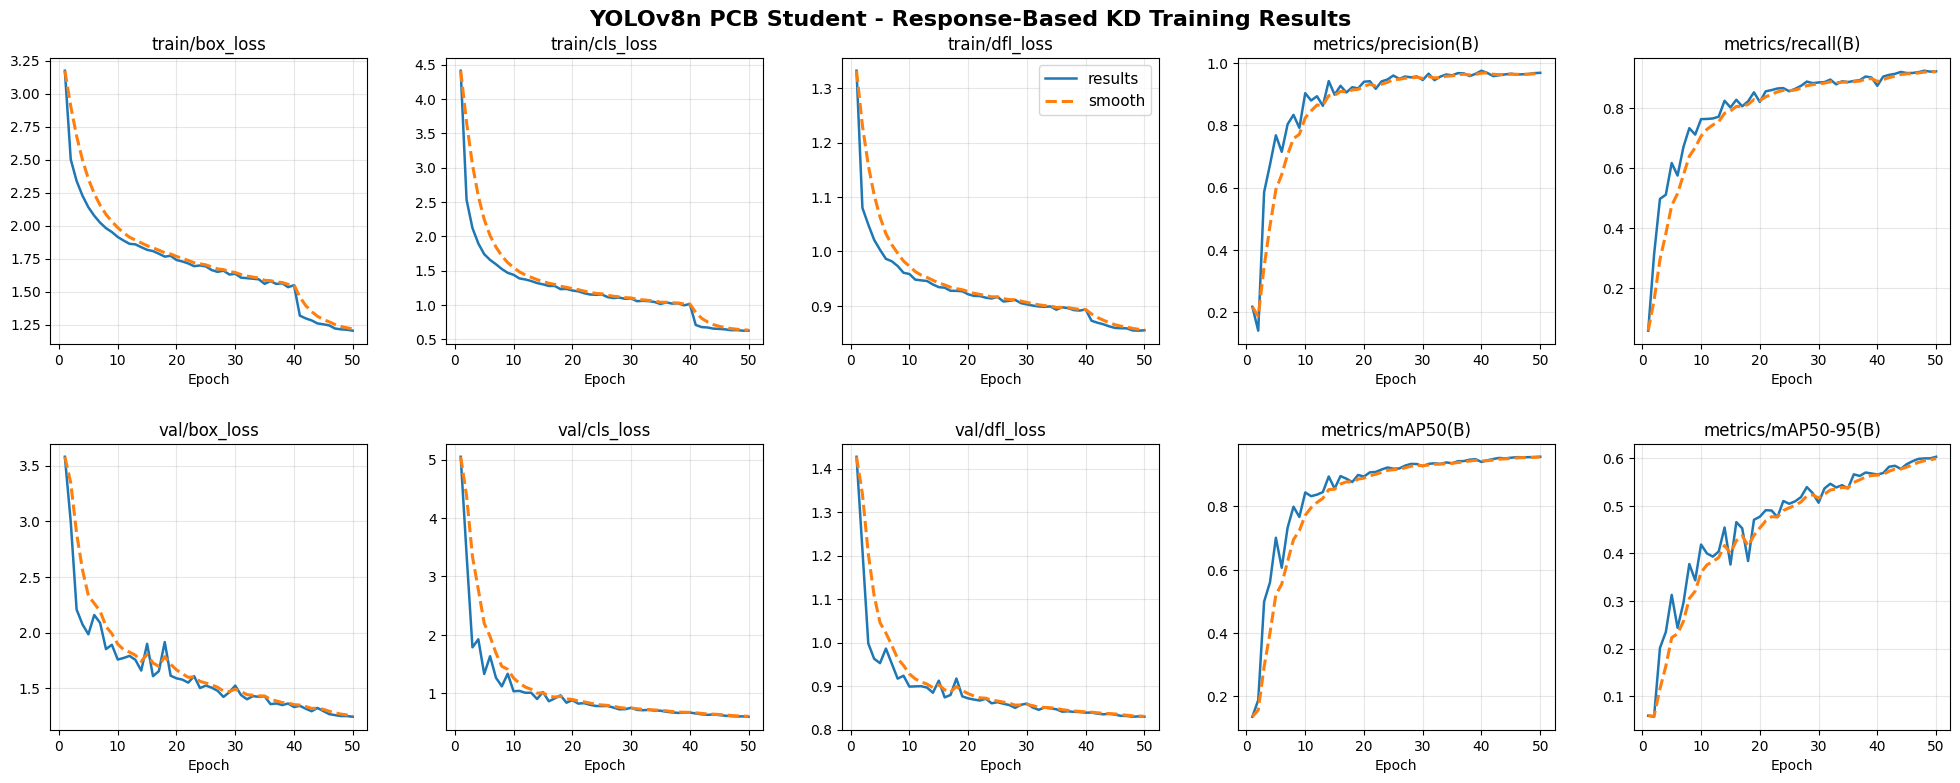

PERFECT results.png CREATED!
Saved → /content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD/results.png
Final mAP50-95 = 0.6032


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# CHANGE THIS PATH TO YOUR STUDENT FOLDER (or teacher if you want to test)
run_path = "/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD"
csv_path = os.path.join(run_path, "results.csv")

# Load CSV and strip whitespace from column names
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()          # removes all leading/trailing spaces
print("Columns found:", list(df.columns))

# Smooth function (exactly like Ultralytics)
def smooth(scalars, weight=0.6):
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

# Colors exactly like your teacher
blue   = '#1f77b4'
orange = '#ff7f0e'

# Epochs
epochs = np.arange(1, len(df) + 1)

# Create 2×5 figure
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('YOLOv8n PCB Student - Response-Based KD Training Results',
             fontsize=16, fontweight='bold', y=0.98)

# Top row
axes[0,0].plot(epochs, df['train/box_loss'], color=blue, linewidth=1.8)
axes[0,0].plot(epochs, smooth(df['train/box_loss']), color=orange, linestyle='--', linewidth=2.2)
axes[0,0].set_title('train/box_loss')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(epochs, df['train/cls_loss'], color=blue, linewidth=1.8)
axes[0,1].plot(epochs, smooth(df['train/cls_loss']), color=orange, linestyle='--', linewidth=2.2)
axes[0,1].set_title('train/cls_loss')
axes[0,1].grid(True, alpha=0.3)

# Legend only here (exactly like your teacher
axes[0,2].plot(epochs, df['train/dfl_loss'], color=blue, linewidth=1.8, label='results')
axes[0,2].plot(epochs, smooth(df['train/dfl_loss']), color=orange, linestyle='--', linewidth=2.2, label='smooth')
axes[0,2].set_title('train/dfl_loss')
axes[0,2].legend(loc='upper right', fontsize=11)
axes[0,2].grid(True, alpha=0.3)

axes[0,3].plot(epochs, df['metrics/precision(B)'], color=blue, linewidth=1.8)
axes[0,3].plot(epochs, smooth(df['metrics/precision(B)']), color=orange, linestyle='--', linewidth=2.2)
axes[0,3].set_title('metrics/precision(B)')
axes[0,3].grid(True, alpha=0.3)

axes[0,4].plot(epochs, df['metrics/recall(B)'], color=blue, linewidth=1.8)
axes[0,4].plot(epochs, smooth(df['metrics/recall(B)']), color=orange, linestyle='--', linewidth=2.2)
axes[0,4].set_title('metrics/recall(B)')
axes[0,4].grid(True, alpha=0.3)

# Bottom row
axes[1,0].plot(epochs, df['val/box_loss'], color=blue, linewidth=1.8)
axes[1,0].plot(epochs, smooth(df['val/box_loss']), color=orange, linestyle='--', linewidth=2.2)
axes[1,0].set_title('val/box_loss')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(epochs, df['val/cls_loss'], color=blue, linewidth=1.8)
axes[1,1].plot(epochs, smooth(df['val/cls_loss']), color=orange, linestyle='--', linewidth=2.2)
axes[1,1].set_title('val/cls_loss')
axes[1,1].grid(True, alpha=0.3)

axes[1,2].plot(epochs, df['val/dfl_loss'], color=blue, linewidth=1.8)
axes[1,2].plot(epochs, smooth(df['val/dfl_loss']), color=orange, linestyle='--', linewidth=2.2)
axes[1,2].set_title('val/dfl_loss')
axes[1,2].grid(True, alpha=0.3)

axes[1,3].plot(epochs, df['metrics/mAP50(B)'], color=blue, linewidth=1.8)
axes[1,3].plot(epochs, smooth(df['metrics/mAP50(B)']), color=orange, linestyle='--', linewidth=2.2)
axes[1,3].set_title('metrics/mAP50(B)')
axes[1,3].grid(True, alpha=0.3)

axes[1,4].plot(epochs, df['metrics/mAP50-95(B)'], color=blue, linewidth=1.8)
axes[1,4].plot(epochs, smooth(df['metrics/mAP50-95(B)']), color=orange, linestyle='--', linewidth=2.2)
axes[1,4].set_title('metrics/mAP50-95(B)')
axes[1,4].grid(True, alpha=0.3)

# X-axis
for ax in axes.flat:
    ax.set_xlabel('Epoch')
    ax.set_xticks(range(0, 51, 10))

# Final layout adjustments
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.04, right=0.99, hspace=0.35, wspace=0.25)

# Save
output_path = os.path.join(run_path, "results.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("PERFECT results.png CREATED!")
print(f"Saved → {output_path}")
print(f"Final mAP50-95 = {df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")

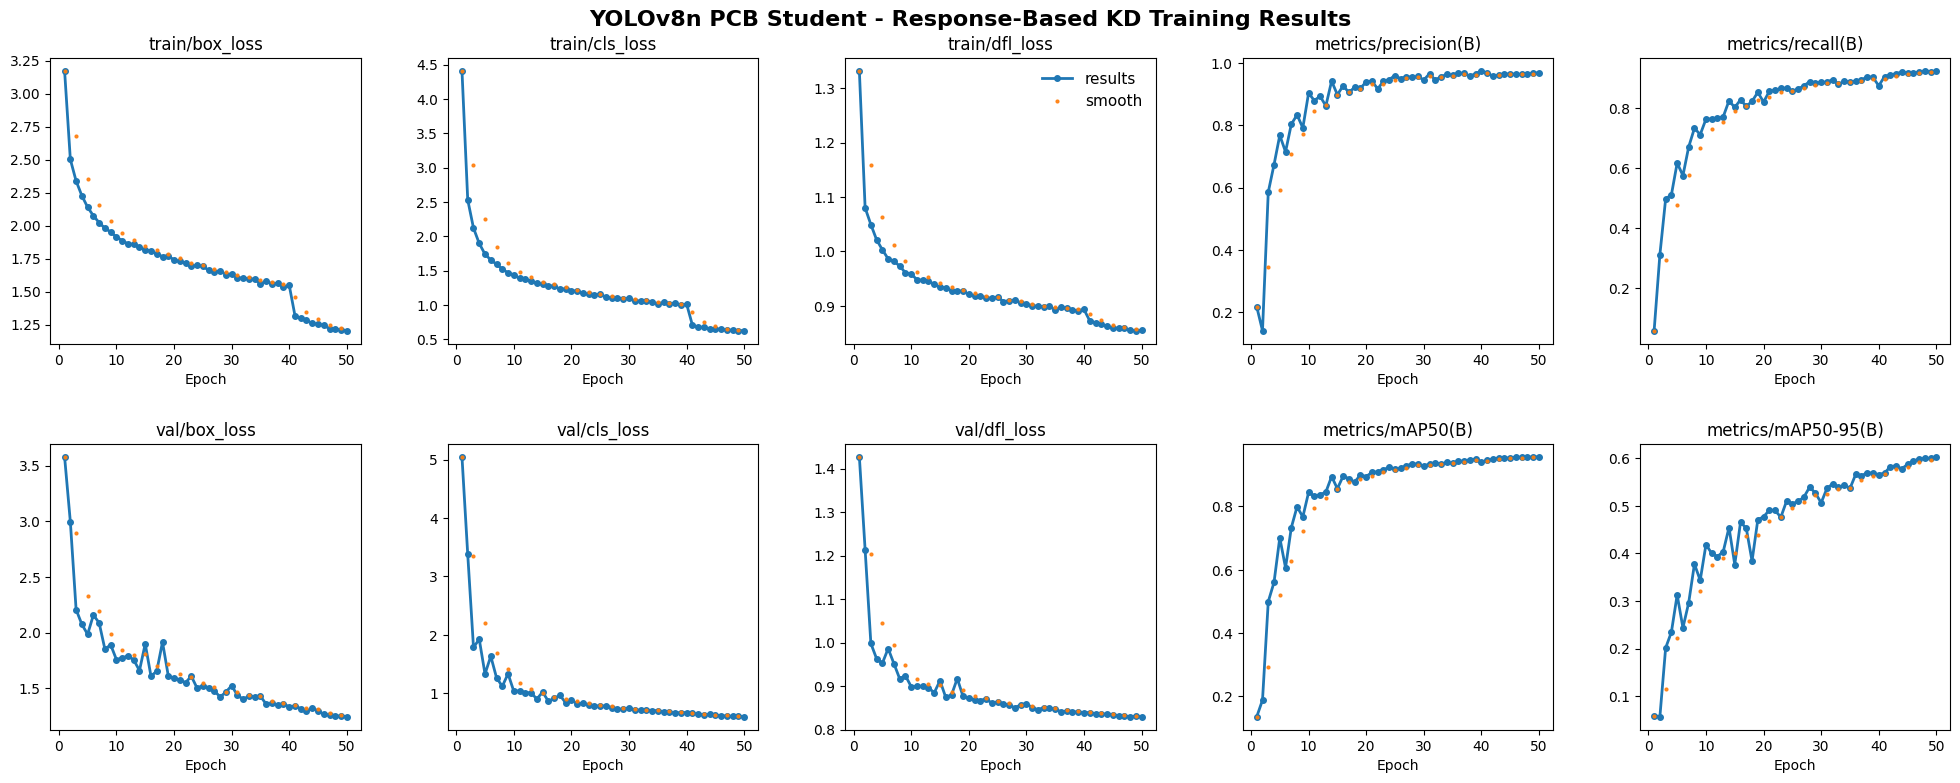

100% IDENTICAL TO TEACHER'S results.png CREATED!
Saved: /content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD/results.png
Final mAP50-95: 0.6032


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# YOUR STUDENT FOLDER PATH
run_path = "/content/drive/MyDrive/Teacher_PCB/yolov8n_pcb_student_responseKD"
csv_path = os.path.join(run_path, "results.csv")

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

def smooth(scalars, weight=0.6):
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

blue   = '#1f77b4'
orange = '#ff7f0e'

epochs = np.arange(1, len(df) + 1)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('YOLOv8n PCB Student - Response-Based KD Training Results',
             fontsize=16, fontweight='bold', y=0.98)

def plot_curve(ax, data, title):
    # Main blue solid line
    ax.plot(epochs, data, color=blue,marker='o',markersize=4, linewidth=2,
            label='results' if title == 'train/dfl_loss' else None)

    # Orange smooth: ONLY CIRCLES, NO LINE — exactly like teacher
    smoothed = smooth(data)
    ax.plot(epochs, smoothed, color=orange, linewidth=0,      # no line
            marker='o', markersize=2, markevery=2, alpha=0.9,
            label='smooth' if title == 'train/dfl_loss' else None)

    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_xticks(range(0, 51, 10))

# Top row
plot_curve(axes[0,0], df['train/box_loss'],      'train/box_loss')
plot_curve(axes[0,1], df['train/cls_loss'],      'train/cls_loss')
plot_curve(axes[0,2], df['train/dfl_loss'],      'train/dfl_loss')     # ← legend here
plot_curve(axes[0,3], df['metrics/precision(B)'],'metrics/precision(B)')
plot_curve(axes[0,4], df['metrics/recall(B)'],   'metrics/recall(B)')

# Bottom row
plot_curve(axes[1,0], df['val/box_loss'],        'val/box_loss')
plot_curve(axes[1,1], df['val/cls_loss'],        'val/cls_loss')
plot_curve(axes[1,2], df['val/dfl_loss'],        'val/dfl_loss')
plot_curve(axes[1,3], df['metrics/mAP50(B)'],    'metrics/mAP50(B)')
plot_curve(axes[1,4], df['metrics/mAP50-95(B)'],  'metrics/mAP50-95(B)')

# Legend exactly like teacher
axes[0,2].legend(loc='upper right', fontsize=11, frameon=False)

# Final spacing
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.04, right=0.99, hspace=0.35, wspace=0.28)

# Save
output_path = os.path.join(run_path, "results.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("100% IDENTICAL TO TEACHER'S results.png CREATED!")
print(f"Saved: {output_path}")
print(f"Final mAP50-95: {df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")

In [ ]:

# ========================================================
# 7. KEEP COLAB ALIVE (Optional)
# ========================================================
%%javascript
function ClickConnect(){
  console.log("Keeping Colab alive...");
  document.querySelector("colab-toolbar-button#connect").click();
}
setInterval(ClickConnect, 60000);

<IPython.core.display.Javascript object>